<a href="https://colab.research.google.com/github/JaredGlaub/NeuralNetworks/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Machine Learning
### Assignment 7 - Image Processing with Convolutional Neural Networks(CNN)

Description:
This assignment follows the same structure as Assignment 6. We will employ at least a 2x2 completely crossed experimental design. We will again use a simple training-and-test regimen. The factors in the design may include numbers of layers and/or nodes within layers, types of layers (convolutional or pooling), and/or other hyperparameters. You will utilize convolutional neural networks (CNNs) within Python TensorFlow. 

This week, you will compete in the Dogs vs. Cats kernels Edition Kaggle.com competition, https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition (Links to an external site.). .  (Links to an external site.)Specifically, you will build models using the training set to forecast the test set. The images are in .jpg format, so you will need to research how to handle that.  You are required to submit no fewer than four models for evaluation by Kaggle.com, and you must provide your Kaggle.com scores and user ID for validation. 

The original data consisted of 25,000 images of cats and dogs. To ensure that the problem may be run on typical personal computers with limited memory and no graphical processing units (GPUs), we work with only 2,000 images: 1,000 cat images and 1,000 dog images. The original image files are provided in a zip archive:


Management Problem
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best?



Programming Resources
Refer once again to the programming resources cited under Assignment 6. Convolutional neural network coding examples are provided in the Géron (2017) textbook.

Géron, A. (2019). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. hapter 14: Convolutional Neural Networks.

Regarding memory issues. With the large number of parameters being fit in deep learning tasks, out-of-memory errors may be encountered on personal computers. Géron (2017, p. 363) provides these suggestions with regard to CNNs:

If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats.

Additional background regarding computer vision, CNNs, and TensorFlow is provided under week 7 Additional Resources
 

Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
- Please upload the completed jupyter notebook (PREFERRED)

OR

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
Refer to Google’s Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python code

Also refer to Google’s TensorFlow Style Guide (Links to an external site.)Links to an external site.

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

##### minimize

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#ignore tensorflow related warnings
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [ ]:
# coding: utf-8

# Initial deep neural network set-up from 
# Géron, A. 2017. Hands-On Machine Learning with Scikit-Learn 
#    & TensorFlow: Concepts, Tools, and Techniques to Build 
#    Intelligent Systems. Sebastopol, Calif.: O'Reilly. 
#    [ISBN-13 978-1-491-96229-9] 
#    Source code available at https://github.com/ageron/handson-ml
#    See file 10_introduction_to_artificial_neural_networks.ipynb 
#    Revised from MNIST to Cats and Dogs to begin Assignment 7
#    #CatsDogs# comment lines show additions/revisions for Cats and Dogs

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [ ]:
# Common imports for our work
import os 
import numpy as np
import tensorflow as tf
import time
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import random
import re # regular expressions
import scipy
import os # Operation System
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
from shutil import copyfile
import sklearn
import tensorflow as tf
from datetime import datetime
import cv2
import seaborn as sns
import zipfile


from matplotlib import pyplot
from matplotlib.image import imread
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image, display

##### Secure dataset and image preprocessing

In [ ]:
# setup drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# create a data directory in the present working directory

os.getcwd() 
%cd /content/gdrive/MyDrive/422Data/Assignment7/
os.chdir('.')
print('Working Directory')
work_dir = "/content/gdrive/MyDrive/422Data/Assignment7/"
print(os.getcwd())  
%ls

/content/gdrive/MyDrive/422Data/Assignment7
Working Directory
/content/gdrive/MyDrive/422Data/Assignment7
CNN_aug.csv            resnet_transfer_3.csv       submission_aug_shrunk.csv
CNN_Augmented.csv      resnet_transfer.csv         submission.csv
data/                  resnet_transfer_redo_2.csv  submission_resnet_final.csv
MCVD_model.png         resnet_transfer_redo.csv    test_set/
resnet_transfer_2.csv  submission_aug.csv          transfer_resnet.csv


In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "./data/cats-and-dogs.zip"

local_zip = './data/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

--2021-05-18 18:49:43--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.73.0.105, 2600:1409:12:285::e59, 2600:1409:12:2af::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.73.0.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘./data/cats-and-dogs.zip’

./data/cats-and-dog 100%[===================>] 786.68M  68.1MB/s    in 13s     

2021-05-18 18:49:56 (61.7 MB/s) - ‘./data/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('./data/PetImages/Cat/')))
print(len(os.listdir('./data/PetImages/Dog/')))

12501
12501


In [ ]:
try:
    os.mkdir('./data/cats_v_dogs')
    os.mkdir('./data/cats_v_dogs/training')
    os.mkdir('./data/cats_v_dogs/testing')
    os.mkdir('./data/cats_v_dogs/training/cats')
    os.mkdir('./data/cats_v_dogs/training/dogs')
    os.mkdir('./data/cats_v_dogs/testing/cats')
    os.mkdir('./data/cats_v_dogs/testing/dogs')
except OSError:
    pass

In [ ]:
# import shutil

# shutil.rmtree('/content/gdrive/MyDrive/422Data/Assignment7/data/test_set')

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "./data/PetImages/Cat/"
TRAINING_CATS_DIR = "./data/cats_v_dogs/training/cats/"
TESTING_CATS_DIR = "./data/cats_v_dogs/testing/cats/"
DOG_SOURCE_DIR = "./data/PetImages/Dog/"
TRAINING_DOGS_DIR = "./data/cats_v_dogs/training/dogs/"
TESTING_DOGS_DIR = "./data/cats_v_dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:
print(len(os.listdir('./data/cats_v_dogs/training/cats/')))
print(len(os.listdir('./data/cats_v_dogs/training/dogs/')))
print(len(os.listdir('./data/cats_v_dogs/testing/cats/')))
print(len(os.listdir('./data/cats_v_dogs/testing/dogs/')))

12012
11997
5762
5747


In [ ]:
#  # Directory
# directory_cats = "cats"
# directory_dogs = "dogs"
  
# # Parent Directory path
# parent_dir = "./cats_dogs_images/"
  
# # Path
# path_cats = os.path.join(parent_dir, directory_cats)
# path_dogs = os.path.join(parent_dir, directory_dogs)
  
# # Create the directorys

# os.mkdir(path_cats)
# os.mkdir(path_dogs)

# # prove creation
# print("Directory '%s' created" %directory_cats)
# print("Directory '%s' created" %directory_dogs)

# # Set path variables ( make sure the directories & the images exist )
# # cat_image_dir_name = './cats_dogs_images/cats'
# # dog_image_dir_name = './cats_dogs_images/dogs'

In [ ]:
#  # Cat map directory for training.
# train_cats_dir = os.path.join(train_dir, 'cats')
#  # Dog map directory for training.
# train_dogs_dir = os.path.join(train_dir, 'dogs')

In [ ]:
# TRAIN_DIR = '../train/'

In [ ]:
# train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
# train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
# train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

In [ ]:
# train_cats

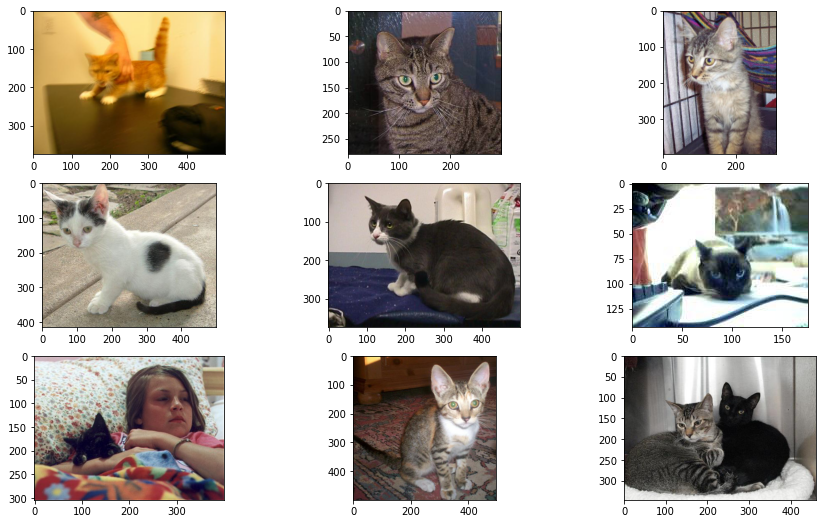

In [ ]:
fig = plt.figure(figsize = (15, 9))
Catfolder = './data/PetImages/Cat/'
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# define filename
    filename = Catfolder + str(i) + '.jpg'
# load image pixels
    image = imread(filename)
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

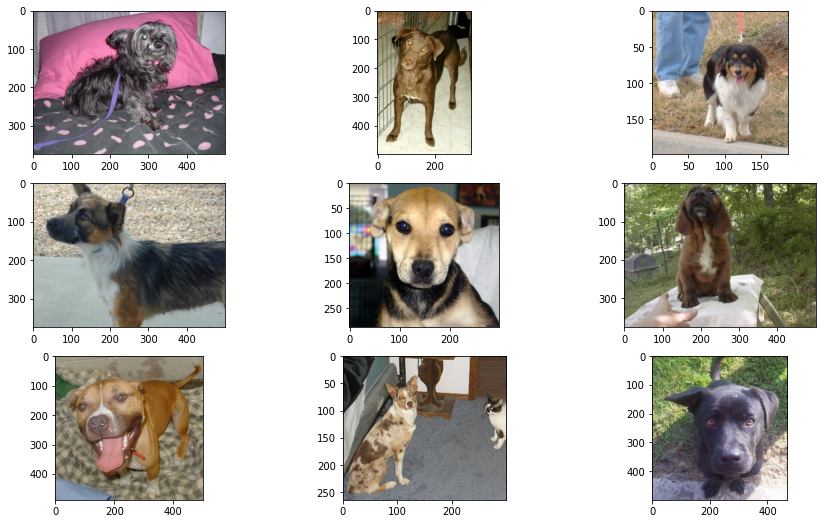

In [ ]:
fig = plt.figure(figsize = (15, 9))
Dogfolder = './data/PetImages/Dog/'
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# define filename
    filename = Dogfolder + str(i) + '.jpg'
# load image pixels
    image = imread(filename)
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
# create architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

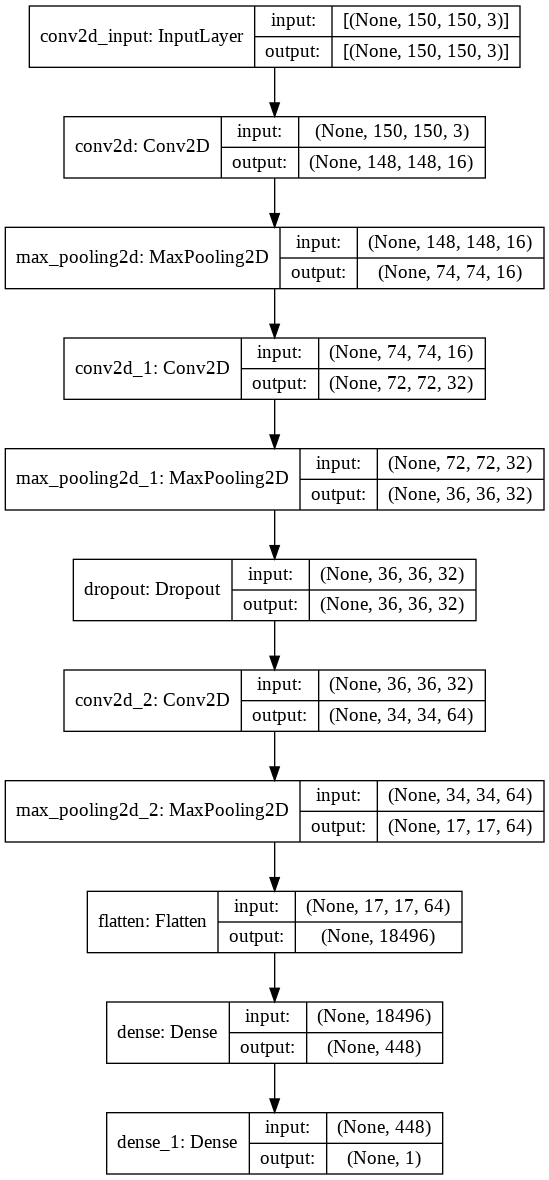

In [ ]:
keras.utils.plot_model(model, "MCVD_model.png", show_shapes=True)

In [ ]:
# define grad desc algos
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# preprocess images, create batches for cross-val

TRAINING_DIR = "./data/cats_v_dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "./data/cats_v_dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

In [ ]:
# train model
history = model.fit(train_generator, epochs=3
                    ,validation_data=validation_generator
                    ,validation_steps=6)

In [ ]:
# setup to visualize output
history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# accuracy
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# loss
plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
plt.ylim([0.0, 0.5])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# test set predictions
predictions = model.predict(validation_generator, validation_generator)

In [ ]:
print('shape of preds: ', predictions.shape)

In [ ]:
listOfImageNames = ["./data/PetImages/Cat/2021.jpg"]
for imageName in listOfImageNames:
    display(Image(filename=imageName))
    print(imageName)

In [ ]:
listOfImageNames = ["./data/PetImages/Dog/2020.jpg"]
for imageName in listOfImageNames:
    display(Image(filename=imageName))
    print(imageName)

In [ ]:
predictions[2021]
# predictions[2020]

In [ ]:
# add data augmentation to model to lessen edge cases
gen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)

batches = gen.flow(X, y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)

In [ ]:
# preprocess images, create batches for cross-val, adding data augmentation

IMG_SHAPE = 150
BATCH_SIZE = 250
rescale_val = 1.0/255.

# img_flow = img_gen.flow_from_directory(flowers, 
#     shuffle=True, 
#     batch_size=BATCH_SIZE,
#     target_size=(IMG_SHAPE, IMG_SHAPE))

TRAINING_DIR = "./data/cats_v_dogs/training/"
train_datagen_aug = ImageDataGenerator(
                      rescale = rescale_val, # gray
                      rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
                      zoom_range = 0.1, # Randomly zoom image 
                      width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
                      height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
                      )
train_generator_aug = train_datagen_aug.flow_from_directory(TRAINING_DIR,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'binary',
                                                    target_size = (IMG_SHAPE, IMG_SHAPE))

VALIDATION_DIR = "./data/cats_v_dogs/testing/"
validation_datagen_aug = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      width_shift_range = 0.1, 
                      height_shift_range = 0.1,
                      )
validation_generator_aug = validation_datagen_aug.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='binary',
                                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator_aug, epochs=5
                    ,validation_data=validation_generator_aug
                    ,validation_steps=6)

Epoch 1/5
90/90 [==============================] - 215s 2s/step - loss: 1.0032 - acc: 0.5067 - val_loss: 0.6498 - val_acc: 0.6593
Epoch 2/5
90/90 [==============================] - 180s 2s/step - loss: 0.6170 - acc: 0.6557 - val_loss: 0.5724 - val_acc: 0.6927
Epoch 3/5
90/90 [==============================] - 177s 2s/step - loss: 0.5847 - acc: 0.6898 - val_loss: 0.5385 - val_acc: 0.7253
Epoch 4/5
90/90 [==============================] - 177s 2s/step - loss: 0.5363 - acc: 0.7270 - val_loss: 0.4930 - val_acc: 0.7533
Epoch 5/5
90/90 [==============================] - 178s 2s/step - loss: 0.5092 - acc: 0.7462 - val_loss: 0.4776 - val_acc: 0.7907


In [ ]:
predictions = model.predict(validation_generator_aug, validation_generator_aug)

In [ ]:
predictions[2021]

array([0.8186147], dtype=float32)

In [ ]:
len(validation_generator_aug)

10

In [ ]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [ ]:
test_images_dogs_cats.sort(key=natural_keys)

In [ ]:
ids = np.array([f'{f}' for f in os.listdir(VALIDATION_DIR)])

In [ ]:
ids= [i.replace(".jpg","") for i in ids]

In [ ]:
# ids[2]

In [ ]:
id = range(1, len(predictions) + 1)
sol = pd.DataFrame({"id": id, "label":list(predictions)})
cols = ['label']

for col in cols:
    sol[col] = sol[col].map(lambda x: str(x).lstrip('[').rstrip(']')).astype(float)

sol.to_csv("CNN_aug.csv", index = False)

In [ ]:
np.savetxt('CNN_Augmented.csv', 
           np.c_[range(1,len(predictions)+1),predictions], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# setup to visualize output
history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# accuracy
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# loss
plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
plt.ylim([0.0, 0.5])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Order predictions for Kaggle

In [ ]:
# !wget --no-check-certificate \
#     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#     -O "./data/cats-and-dogs.zip"

test_zip = './data/test_set/testset.zip'
zip_ref = zipfile.ZipFile(test_zip, 'r')
zip_ref.extractall('./data/final')
zip_ref.close()


# /content/gdrive/MyDrive/422Data/Assignment7/data/test_set/testset.zip
# %ls

In [ ]:
test_images = os.listdir('./data/final/test')
print(len(test_images))

# test_images = os.listdir('/kaggle/working/test_all/test')
# print(len(test_images))

12500


In [ ]:
# ids= fnames = np.array([f'{f}' for f in test_images])
ids = np.array([f'{f}' for f in test_images])

In [ ]:
ids = [i.replace(".jpg","") for i in ids]

'100'

In [ ]:
# probs = predictions[:,0]

# ans = pd.DataFrame({"id":ids,"label":probs})
# ans = ans.sort_values('id')
# ans.head()

12500

In [ ]:
TEST_DIR = './data/final/'
test_datagen = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      width_shift_range = 0.1, 
                      height_shift_range = 0.1,
                      )

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size= (IMG_SHAPE, IMG_SHAPE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary')
test_generator.reset()

predictions = model.predict(test_generator, test_generator)

Found 12500 images belonging to 1 classes.


In [ ]:
probs = predictions[:,0]

ans = pd.DataFrame({"id":ids,"label":probs})
ans = ans.sort_values('id')
ans.head()

,id,label
0,1,0.738032
1,10,0.091081
2,100,0.594194
3,1000,0.967162
4,10000,0.483310


In [ ]:
ans.to_csv('submission.csv', index=False)

In [ ]:
size = (150, 150)

carprice['fueltype']=carprice['fueltype'].map({'gas':1,'diesel':0})

train_ds = TRAINING_DIR.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = VALIDATION_DIR.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = TESTING_DIR.map(lambda x, y: (tf.image.resize(x, size), y))

##### Update Model

In [ ]:
split_size = 0.6
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:
# preprocess images, create batches for cross-val, adding data augmentation

IMG_SHAPE = 256
BATCH_SIZE_SMALL = 25
rescale_val = 1.0/255.

# img_flow = img_gen.flow_from_directory(flowers, 
#     shuffle=True, 
#     batch_size=BATCH_SIZE,
#     target_size=(IMG_SHAPE, IMG_SHAPE))

TRAINING_DIR = "./data/cats_v_dogs/training/"
traingen_aug = ImageDataGenerator(
                      rescale = rescale_val, # gray
                      rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
                      zoom_range = 0.1, # Randomly zoom image 
                      width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
                      height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
                      )
traingen_small = traingen_aug.flow_from_directory(TRAINING_DIR,
                                                    batch_size = BATCH_SIZE_SMALL,
                                                    class_mode = 'binary',
                                                    target_size = (IMG_SHAPE, IMG_SHAPE))

VALIDATION_DIR = "./data/cats_v_dogs/testing/"
valgen_aug = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      width_shift_range = 0.1, 
                      height_shift_range = 0.1,
                      )
valgen_small = valgen_aug.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=BATCH_SIZE_SMALL,
                                                              class_mode='binary',
                                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 24007 images belonging to 2 classes.
Found 11508 images belonging to 2 classes.


In [ ]:
# BATCH_SIZE_SMALL = 25
# IMG_SHAPE = 256

# datagen = ImageDataGenerator(rescale=1.0/255.)

# train_generator_aug_small = datagen.flow_from_directory(TRAINING_DIR,
#                                                     batch_size = BATCH_SIZE_SMALL,
#                                                     class_mode = 'binary',
#                                                     target_size = (IMG_SHAPE, IMG_SHAPE))
# validation_generator_aug_small = datagen.flow_from_directory(VALIDATION_DIR,
#                                                               batch_size=BATCH_SIZE_SMALL,
#                                                               class_mode='binary',
#                                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# # preprocess images, create batches for cross-val

# TRAINING_DIR = "./data/cats_v_dogs/training/"
# train_datagen = ImageDataGenerator(rescale=1.0/255.)
# train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
#                                                     batch_size=250,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))

# VALIDATION_DIR = "./data/cats_v_dogs/testing/"
# validation_datagen = ImageDataGenerator(rescale=1.0/255.)
# validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
#                                                               batch_size=250,
#                                                               class_mode='binary',
#                                                               target_size=(150, 150))

In [ ]:
# create architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# model.summary()

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.fit(traingen_small, epochs = epochs
                    ,validation_data = valgen_small
                    ,validation_steps=6)

Epoch 1/10
961/961 [==============================] - 362s 376ms/step - loss: 0.6469 - accuracy: 0.6103 - val_loss: 0.5857 - val_accuracy: 0.7400
Epoch 2/10
961/961 [==============================] - 362s 377ms/step - loss: 0.5211 - accuracy: 0.7385 - val_loss: 0.4939 - val_accuracy: 0.7600
Epoch 3/10
961/961 [==============================] - 380s 395ms/step - loss: 0.4679 - accuracy: 0.7734 - val_loss: 0.4217 - val_accuracy: 0.8267
Epoch 4/10
961/961 [==============================] - 383s 398ms/step - loss: 0.4428 - accuracy: 0.7946 - val_loss: 0.4056 - val_accuracy: 0.8333
Epoch 5/10
961/961 [==============================] - 378s 393ms/step - loss: 0.4139 - accuracy: 0.8103 - val_loss: 0.4471 - val_accuracy: 0.7800
Epoch 6/10
961/961 [==============================] - 372s 387ms/step - loss: 0.3934 - accuracy: 0.8242 - val_loss: 0.3895 - val_accuracy: 0.8733
Epoch 7/10
961/961 [==============================] - 368s 383ms/step - loss: 0.3752 - accuracy: 0.8303 - val_loss: 0.3468 -

In [ ]:
test_datagen = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      width_shift_range = 0.1, 
                      height_shift_range = 0.1,
                      )

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size= (IMG_SHAPE, IMG_SHAPE),
                                                  batch_size=BATCH_SIZE_SMALL,
                                                  class_mode='binary')

Found 12500 images belonging to 1 classes.


In [ ]:
test_generator.reset()

predictions = model.predict(test_generator, test_generator)

In [ ]:
probs = predictions[:,0]

ans = pd.DataFrame({"id":ids,"label":probs})
ans = ans.sort_values('id')
ans.head()

,id,label
0,1,0.001264
1,10,0.232484
2,100,0.809140
3,1000,0.419956
4,10000,0.220758


In [ ]:
ans.to_csv('submission_aug.csv', index=False)

##### Shrink Model, lessen overfitting

In [ ]:
# preprocess images, create batches for cross-val, adding data augmentation
from tensorflow.keras import regularizers

IMG_SHAPE = 256
BATCH_SIZE_SMALL = 25
rescale_val = 1.0/255.
EPOCHS = 10

# img_flow = img_gen.flow_from_directory(flowers, 
#     shuffle=True, 
#     batch_size=BATCH_SIZE,
#     target_size=(IMG_SHAPE, IMG_SHAPE))

TRAINING_DIR = "./data/cats_v_dogs/training/"
traingen_aug = ImageDataGenerator(
                      rescale = rescale_val, # gray
                      rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
                      zoom_range = 0.1, # Randomly zoom image 
                      )
traingen_small = traingen_aug.flow_from_directory(TRAINING_DIR,
                                                    batch_size = BATCH_SIZE_SMALL,
                                                    class_mode = 'binary',
                                                    target_size = (IMG_SHAPE, IMG_SHAPE))

VALIDATION_DIR = "./data/cats_v_dogs/testing/"
valgen_aug = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      )
valgen_small = valgen_aug.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=BATCH_SIZE_SMALL,
                                                              class_mode='binary',
                                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 24007 images belonging to 2 classes.
Found 11508 images belonging to 2 classes.


In [ ]:
# BATCH_SIZE_SMALL = 25
# IMG_SHAPE = 256

# datagen = ImageDataGenerator(rescale=1.0/255.)

# train_generator_aug_small = datagen.flow_from_directory(TRAINING_DIR,
#                                                     batch_size = BATCH_SIZE_SMALL,
#                                                     class_mode = 'binary',
#                                                     target_size = (IMG_SHAPE, IMG_SHAPE))
# validation_generator_aug_small = datagen.flow_from_directory(VALIDATION_DIR,
#                                                               batch_size=BATCH_SIZE_SMALL,
#                                                               class_mode='binary',
#                                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# # preprocess images, create batches for cross-val

# TRAINING_DIR = "./data/cats_v_dogs/training/"
# train_datagen = ImageDataGenerator(rescale=1.0/255.)
# train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
#                                                     batch_size=250,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))

# VALIDATION_DIR = "./data/cats_v_dogs/testing/"
# validation_datagen = ImageDataGenerator(rescale=1.0/255.)
# validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
#                                                               batch_size=250,
#                                                               class_mode='binary',
#                                                               target_size=(150, 150))

In [ ]:
# create architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# #model instantiation


# modelcnn=Sequential()
# modelcnn.add(Conv2D(16, (3,3), activation="relu", input_shape=(img_size, img_size, 3)))
# modelcnn.add(Conv2D(16, (3,3), activation="relu",))
# modelcnn.add(MaxPooling2D((3,3)))

# modelcnn.add(Conv2D(32, (3,3), activation="relu"))
# modelcnn.add(Conv2D(32, (3,3), activation="relu"))
# modelcnn.add(MaxPooling2D(2,2))

# modelcnn.add(Conv2D(64, (3,3), activation="relu"))
# modelcnn.add(Conv2D(64, (3,3), activation="relu"))
# modelcnn.add(MaxPooling2D(2,2))
# modelcnn.add(Dropout(0.3))

# modelcnn.add(Conv2D(32, (3,3), activation="relu"))
# modelcnn.add(MaxPooling2D((2,2)))

# modelcnn.add(Flatten())
# modelcnn.add(Dense(512, activation="relu"))
# modelcnn.add(Dropout(0.5))
# modelcnn.add(Dense(1, activation="sigmoid"))

# modelcnn.compile(loss="binary_crossentropy", 
#          optimizer=optimizers.RMSprop(lr=1e-4),
#          metrics=["accuracy"])

In [ ]:
# model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(traingen_small, callbacks=[es_callback],
          validation_data = valgen_small, epochs = EPOCHS)



# model.fit(df_train, train_labels, callbacks=[es_callback])

Epoch 1/10
961/961 [==============================] - 501s 521ms/step - loss: 0.7211 - accuracy: 0.5385 - val_loss: 0.5975 - val_accuracy: 0.7061
Epoch 2/10
961/961 [==============================] - 499s 519ms/step - loss: 0.5877 - accuracy: 0.7184 - val_loss: 0.5078 - val_accuracy: 0.7870
Epoch 3/10
961/961 [==============================] - 499s 519ms/step - loss: 0.5160 - accuracy: 0.7738 - val_loss: 0.4594 - val_accuracy: 0.8141
Epoch 4/10
961/961 [==============================] - 498s 519ms/step - loss: 0.4815 - accuracy: 0.8006 - val_loss: 0.4479 - val_accuracy: 0.8217
Epoch 5/10
961/961 [==============================] - 498s 518ms/step - loss: 0.4657 - accuracy: 0.8093 - val_loss: 0.4207 - val_accuracy: 0.8384
Epoch 6/10
961/961 [==============================] - 498s 519ms/step - loss: 0.4465 - accuracy: 0.8249 - val_loss: 0.4037 - val_accuracy: 0.8535
Epoch 7/10
961/961 [==============================] - 498s 518ms/step - loss: 0.4399 - accuracy: 0.8293 - val_loss: 0.4048 -

In [ ]:
test_datagen = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      width_shift_range = 0.1, 
                      height_shift_range = 0.1,
                      )

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size= (IMG_SHAPE, IMG_SHAPE),
                                                  batch_size=BATCH_SIZE_SMALL,
                                                  class_mode='binary')

Found 12500 images belonging to 1 classes.


In [ ]:
test_generator.reset()

predictions = model.predict(test_generator, test_generator)

In [ ]:
probs = predictions[:,0]

ans = pd.DataFrame({"id":ids,"label":probs})
ans = ans.sort_values('id')
ans.head()

,id,label
0,1,0.974610
1,10,0.684650
2,100,0.576241
3,1000,0.637153
4,10000,0.018832


In [ ]:
ans.to_csv('submission_aug_shrunk.csv', index=False)

##### improve accuracy

In [ ]:
# preprocess images, create batches for cross-val, adding data augmentation
from tensorflow.keras import regularizers

IMG_SHAPE = 256
BATCH_SIZE_SMALL = 25
rescale_val = 1.0/255.
EPOCHS = 10

# img_flow = img_gen.flow_from_directory(flowers, 
#     shuffle=True, 
#     batch_size=BATCH_SIZE,
#     target_size=(IMG_SHAPE, IMG_SHAPE))

TRAINING_DIR = "./data/cats_v_dogs/training/"
traingen_aug = ImageDataGenerator(
                      rescale = rescale_val, # gray
                      rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
                      zoom_range = 0.1, # Randomly zoom image 
                      )
traingen_small = traingen_aug.flow_from_directory(TRAINING_DIR,
                                                    batch_size = BATCH_SIZE_SMALL,
                                                    class_mode = 'binary',
                                                    target_size = (IMG_SHAPE, IMG_SHAPE))

VALIDATION_DIR = "./data/cats_v_dogs/testing/"
valgen_aug = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      )
valgen_small = valgen_aug.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=BATCH_SIZE_SMALL,
                                                              class_mode='binary',
                                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 24007 images belonging to 2 classes.
Found 11508 images belonging to 2 classes.


In [ ]:
# BATCH_SIZE_SMALL = 25
# IMG_SHAPE = 256

# datagen = ImageDataGenerator(rescale=1.0/255.)

# train_generator_aug_small = datagen.flow_from_directory(TRAINING_DIR,
#                                                     batch_size = BATCH_SIZE_SMALL,
#                                                     class_mode = 'binary',
#                                                     target_size = (IMG_SHAPE, IMG_SHAPE))
# validation_generator_aug_small = datagen.flow_from_directory(VALIDATION_DIR,
#                                                               batch_size=BATCH_SIZE_SMALL,
#                                                               class_mode='binary',
#                                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# # preprocess images, create batches for cross-val

# TRAINING_DIR = "./data/cats_v_dogs/training/"
# train_datagen = ImageDataGenerator(rescale=1.0/255.)
# train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
#                                                     batch_size=250,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))

# VALIDATION_DIR = "./data/cats_v_dogs/testing/"
# validation_datagen = ImageDataGenerator(rescale=1.0/255.)
# validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
#                                                               batch_size=250,
#                                                               class_mode='binary',
#                                                               target_size=(150, 150))

In [ ]:
# create architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# #model instantiation


# modelcnn=Sequential()
# modelcnn.add(Conv2D(16, (3,3), activation="relu", input_shape=(img_size, img_size, 3)))
# modelcnn.add(Conv2D(16, (3,3), activation="relu",))
# modelcnn.add(MaxPooling2D((3,3)))

# modelcnn.add(Conv2D(32, (3,3), activation="relu"))
# modelcnn.add(Conv2D(32, (3,3), activation="relu"))
# modelcnn.add(MaxPooling2D(2,2))

# modelcnn.add(Conv2D(64, (3,3), activation="relu"))
# modelcnn.add(Conv2D(64, (3,3), activation="relu"))
# modelcnn.add(MaxPooling2D(2,2))
# modelcnn.add(Dropout(0.3))

# modelcnn.add(Conv2D(32, (3,3), activation="relu"))
# modelcnn.add(MaxPooling2D((2,2)))

# modelcnn.add(Flatten())
# modelcnn.add(Dense(512, activation="relu"))
# modelcnn.add(Dropout(0.5))
# modelcnn.add(Dense(1, activation="sigmoid"))

# modelcnn.compile(loss="binary_crossentropy", 
#          optimizer=optimizers.RMSprop(lr=1e-4),
#          metrics=["accuracy"])

In [ ]:
# model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(traingen_small, callbacks=[es_callback],
          validation_data = valgen_small, epochs = EPOCHS)



# model.fit(df_train, train_labels, callbacks=[es_callback])

Epoch 1/10
961/961 [==============================] - 501s 521ms/step - loss: 0.7211 - accuracy: 0.5385 - val_loss: 0.5975 - val_accuracy: 0.7061
Epoch 2/10
961/961 [==============================] - 499s 519ms/step - loss: 0.5877 - accuracy: 0.7184 - val_loss: 0.5078 - val_accuracy: 0.7870
Epoch 3/10
961/961 [==============================] - 499s 519ms/step - loss: 0.5160 - accuracy: 0.7738 - val_loss: 0.4594 - val_accuracy: 0.8141
Epoch 4/10
961/961 [==============================] - 498s 519ms/step - loss: 0.4815 - accuracy: 0.8006 - val_loss: 0.4479 - val_accuracy: 0.8217
Epoch 5/10
961/961 [==============================] - 498s 518ms/step - loss: 0.4657 - accuracy: 0.8093 - val_loss: 0.4207 - val_accuracy: 0.8384
Epoch 6/10
961/961 [==============================] - 498s 519ms/step - loss: 0.4465 - accuracy: 0.8249 - val_loss: 0.4037 - val_accuracy: 0.8535
Epoch 7/10
961/961 [==============================] - 498s 518ms/step - loss: 0.4399 - accuracy: 0.8293 - val_loss: 0.4048 -

In [ ]:
test_datagen = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      width_shift_range = 0.1, 
                      height_shift_range = 0.1,
                      )

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size= (IMG_SHAPE, IMG_SHAPE),
                                                  batch_size=BATCH_SIZE_SMALL,
                                                  class_mode='binary')

Found 12500 images belonging to 1 classes.


In [ ]:
test_generator.reset()

predictions = model.predict(test_generator, test_generator)

In [ ]:
probs = predictions[:,0]

ans = pd.DataFrame({"id":ids,"label":probs})
ans = ans.sort_values('id')
ans.head()

,id,label
0,1,0.974610
1,10,0.684650
2,100,0.576241
3,1000,0.637153
4,10000,0.018832


In [ ]:
ans.to_csv('submission_aug_shrunk.csv', index=False)

##### transfer learning

In [ ]:
from keras.applications import resnet
from keras.layers import *
from keras.models import Model, Sequential
from keras import optimizers
from keras import regularizers

In [ ]:
IMG_SHAPE = 256
BATCH_SIZE_SMALL = 25
rescale_val = 1.0/255.
EPOCHS = 10
TRAINING_DIR = "./data/cats_v_dogs/training/"
VALIDATION_DIR = "./data/cats_v_dogs/testing/"

In [ ]:
# preprocess images, create batches for cross-val, adding data augmentation
from tensorflow.keras import regularizers

IMG_SHAPE = 256
BATCH_SIZE_SMALL = 25
rescale_val = 1.0/255.
EPOCHS = 10

# img_flow = img_gen.flow_from_directory(flowers, 
#     shuffle=True, 
#     batch_size=BATCH_SIZE,
#     target_size=(IMG_SHAPE, IMG_SHAPE))

TRAINING_DIR = "./data/cats_v_dogs/training/"
traingen_aug = ImageDataGenerator(
                      rescale = rescale_val, # gray
                      rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
                      zoom_range = 0.1, # Randomly zoom image 
                      )
traingen_small = traingen_aug.flow_from_directory(TRAINING_DIR,
                                                    batch_size = BATCH_SIZE_SMALL,
                                                    class_mode = 'binary',
                                                    target_size = (IMG_SHAPE, IMG_SHAPE))

VALIDATION_DIR = "./data/cats_v_dogs/testing/"
valgen_aug = ImageDataGenerator(
                      rescale = rescale_val,
                      rotation_range= 10,
                      zoom_range = 0.1,
                      )
valgen_small = valgen_aug.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=BATCH_SIZE_SMALL,
                                                              class_mode='binary',
                                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 24007 images belonging to 2 classes.
Found 11508 images belonging to 2 classes.


In [ ]:
# resnet preprocess

train_datagen = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest',
            width_shift_range=0.1,
            height_shift_range=0.1,
            preprocessing_function = resnet.preprocess_input)

train_gen = train_datagen.flow_from_directory(
                    TRAINING_DIR,
                    target_size=(IMG_SHAPE, IMG_SHAPE),
                    batch_size = BATCH_SIZE_SMALL,
                    class_mode='binary')

valid_datagen = ImageDataGenerator(preprocessing_function = resnet.preprocess_input)

valid_gen = valid_datagen.flow_from_directory(
            VALIDATION_DIR,
            target_size=(IMG_SHAPE, IMG_SHAPE),
            batch_size = BATCH_SIZE_SMALL,
            class_mode='binary')

Found 24007 images belonging to 2 classes.
Found 11508 images belonging to 2 classes.


In [ ]:
np.random.seed(2020)

res = resnet.ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

res_train_gen = train_gen
res_valid_gen = valid_gen


for layer in res.layers[:171]:
    layer.trainable=False
    

flat = Flatten()(res.output)   #Flatten the output layer from our Resnet model
dense = Dense(1024,activation='relu')(flat)
drop = Dropout(0.5)(dense)
classifier = Dense(1, activation='sigmoid')(drop)


res_model = Model(res.input, classifier)
optimizer=optimizers.Adam(1e-5)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

res_model.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

res_model.fit(res_train_gen,
                    epochs=10,
                    callbacks=[es_callback],
                    validation_data=res_valid_gen,
                    validation_steps= BATCH_SIZE_SMALL,
                    steps_per_epoch = BATCH_SIZE_SMALL)


94773248/94765736 [==============================] - 0s 0us/step
Epoch 1/10
25/25 [==============================] - 341s 13s/step - loss: 0.4823 - accuracy: 0.8249 - val_loss: 0.0477 - val_accuracy: 0.9824
Epoch 2/10
25/25 [==============================] - 294s 12s/step - loss: 0.1476 - accuracy: 0.9546 - val_loss: 0.0436 - val_accuracy: 0.9824
Epoch 3/10
25/25 [==============================] - 291s 12s/step - loss: 0.1071 - accuracy: 0.9582 - val_loss: 0.0240 - val_accuracy: 0.9872
Epoch 4/10
25/25 [==============================] - 273s 11s/step - loss: 0.0714 - accuracy: 0.9860 - val_loss: 0.0905 - val_accuracy: 0.9776
Epoch 5/10
25/25 [==============================] - 262s 11s/step - loss: 0.0406 - accuracy: 0.9882 - val_loss: 0.0795 - val_accuracy: 0.9744


In [ ]:
loss, accuracy = res_model.evaluate_generator(res_valid_gen, res_valid_gen.samples/150, workers=12)
print("Validation: accuracy = %f loss = %f " % (accuracy, loss))
# loss[['loss', 'val_loss']].plot()
# loss[['accuracy', 'val_accuracy']].plot()

Validation: accuracy = 0.990130 loss = 0.031622 


In [ ]:
# test_gen.reset()

TEST_DIR = './data/final/'

test_data_generator = ImageDataGenerator(preprocessing_function = resnet.preprocess_input)

test_gen = test_data_generator.flow_from_directory(TEST_DIR,
                                                  target_size= (IMG_SHAPE, IMG_SHAPE),
                                                  batch_size=BATCH_SIZE_SMALL,
                                                  class_mode='binary')

In [ ]:
# test_gen.reset()

# test_df = pd.DataFrame({'filename': TEST_DIR}, index=[0])

TEST_DIR = './data/final/'

test_datagen = ImageDataGenerator(preprocessing_function = resnet.preprocess_input)

test_gen = test_datagen.flow_from_directory(TEST_DIR, batch_size = 1, class_mode = None, shuffle = False,
                                            target_size = (IMG_SHAPE, IMG_SHAPE))

In [ ]:
filenames = test_gen.filenames
nb_samples = len(filenames)

In [ ]:
# nb_samples

12500

In [ ]:
# Reset before each call to predict
test_gen.reset()

prediction = res_model.predict(test_gen, steps = len(test_gen), verbose = 1)
prediction = prediction.clip(min = 0.001, max = 0.999)

In [ ]:
test_images = os.listdir('./data/final/test')
print(len(test_images))

12500


In [ ]:
ids = np.array([f'{f}' for f in test_images])
ids = [i.replace(".jpg","") for i in ids]

In [ ]:
probs = prediction[:,0]

ans = pd.DataFrame({"id":ids,"label":probs})
# ans = ans.sort_values('id')
ans.head(10)



In [ ]:
probs = prediction[:,0]
submission = pd.DataFrame({'id':os.listdir(f'./data/final/test'), 'label':probs})
submission = submission.sort_values('id')
submission['id'] = submission['id'].map(lambda x: x.split('.')[0]) # remove .jpg
# submission['id'] = submission['id'].astype(int)
submission.to_csv('transfer_resnet.csv', index=False)
submission.head(10)

,id,label
12000,1,0.999000
12001,10,0.999000
12002,100,0.999000
12003,1000,0.999000
12004,10000,0.999000
12005,10001,0.001000
12006,10002,0.999000
12007,10003,0.001000
12008,10004,0.084461
12009,10005,0.986253


In [ ]:
# submission_df = pd.read_csv('./data/final/sample_submission.csv') # download, then add path

print(len(os.listdir(VALIDATION_DIR)))


# for i, fname in enumerate(TEST_DIR):
#     index = fname[fname.rfind('/')+1:fname.rfind('.')]
#     submission_df.at[index-1, 'label'] = prediction[i]
# submission_df.to_csv('tranfer_resnet.csv', index=False)

2


In [ ]:
submission_df.head()

In [ ]:
test_images = os.listdir('./data/final/test')
print(len(test_images))

12500


In [ ]:
probs = prediction[:,0]

ans = pd.DataFrame({"id":ids,"label":probs})
ans = ans.sort_values('id')
ans.head()

In [ ]:
ans.to_csv('submission_resnet_final.csv', index=False)

In [ ]:
probs = predictions[:,0]
submission = pd.DataFrame({'id':os.listdir(f'./data/final/test'), 'label':probs})
submission['id'] = submission['id'].map(lambda x: x.split('.')[0])
submission['id'] = submission['id'].astype(int)
submission = submission.sort_values('id')
submission.to_csv('resnet_transfer_redo.csv', index=False)

In [ ]:
ids = np.array([f'{f}' for f in test_images])
ids = [i.replace(".jpg","") for i in ids]

probs = predictions[:,0]

ans = pd.DataFrame({"id":ids,"label":probs})
ans = ans.sort_values('id')
ans.head(10)

,id,label
0,1,1.000000e+00
1,10,1.133849e-08
2,100,3.044076e-07
3,1000,1.436777e-11
4,10000,3.151710e-08
5,10001,9.999908e-01
6,10002,5.154805e-06
7,10003,1.000000e+00
8,10004,3.215676e-11
9,10005,2.394741e-09


In [ ]:
ans.to_csv('resnet_transfer_3.csv', index=False)

In [ ]:
# ans['pred_class'] = np.argmax(prediction, axis = 1)
ans['pred_class'] = ans.round({"label":0})

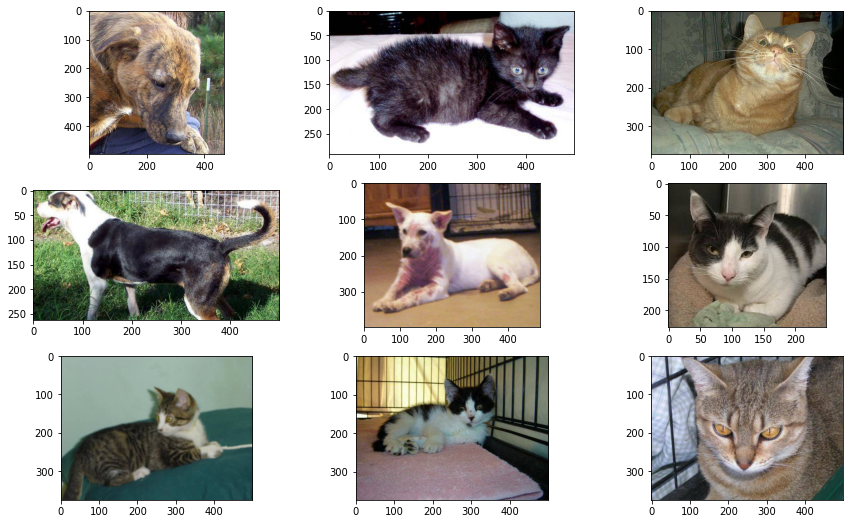

In [ ]:
fig = plt.figure(figsize = (15, 9))
Dogfolder = './data/final/test/'
j = 0
for i in range(10000,10009):
  pred_class_label = "Dog" if pred_class[i] else "Cat"
# define subplot
    pyplot.subplot(330 + 1 + j)
# add classification title
    title.set_text("Predicted:{}".format(pred_class_label))
# define filename
    filename = Dogfolder + str(i) + '.jpg'
# load image pixels
    image = imread(filename)
# plot raw pixel data
    pyplot.imshow(image)
# increment j
    j += 1
# show the figure
pyplot.show()

In [ ]:
# ans.loc[ans['id'] == 10000, 'label']

##### Extra

In [ ]:
# #Standard Functions
# # Sorting of file names facilitated by
# def tryint(s):
#     try:
#         return int(s) 
#     except:
#         return s

# def alphanum_key(s):
#     """ Turn a string into a list of string and number chunks.
#         "z23a" -> ["z", 23, "a"]
#     """
#     return [ tryint(c) for c in re.split('([0-9]+)', s) ]

# def sort_nicely(l):
#     """ Sort the given list in the way that humans expect.
#     """
#     l.sort(key=alphanum_key)
    
# # Generate list of file names, excluding hidden files    
# def directory_list (dir_name):
#     start_list = os.listdir(dir_name)
#     end_list = []
#     for file in start_list:
#         if (not file.startswith('.')):
#             end_list.append(file) 
#     end_list.sort(key = alphanum_key)        
#     return(end_list)        

# cat_file_names = directory_list(CAT_SOURCE_DIR)
# dog_file_names = directory_list(DOG_SOURCE_DIR) 

In [ ]:
# #   Convert image to numpy array. 3 channels for color  and 1 converted to grayscale
# #   Info on npy binary format for saving numpy arrays https://towardsdatascience.com/
# def parse_grayscale(image_file_path):
#     image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
#     return(image)
    
# def parse_color(image_file_path):
#     image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
#     # Default cv2 is BGR... need RGB
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     return(image)
  
# def parse_grayscale_and_resize(image_file_path, size = (64, 64)):
#     image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
#     image = cv2.resize(image, size)
#     return(image)

# def parse_color_and_resize(image_file_path, size = (64, 64)):
#     image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
#     # Default cv2 is BGR... need RGB
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, size)
#     return(image)  
    
# def show_grayscale_image(image):
#     plt.imshow(image, cmap = 'gray') 
#     plt.axis('off')
#     plt.show()

# def show_color_image(image):
#     plt.imshow(image) 
#     plt.axis('off')
#     plt.show()    

In [ ]:
# #Examine dimensions of original raster images 
# cats_shapes = []
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(TRAINING_CATS_DIR, cat_file_names[ifile])
#     image = parse_color(image_file_path)
#     cats_shapes.append(image.shape)
# print('\n\nCat image file shapes:\n')    
# print(cats_shapes)    

# dogs_shapes = []
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(TRAINING_DOGS_DIR, cat_file_names[ifile])
#     image = parse_color(image_file_path)
#     dogs_shapes.append(image.shape)    
# print('\n\nDog image file shapes:\n') 
# print(dogs_shapes)

In [ ]:
# # Save numpy array objects for analysis 
# outdir = './cats_dogs_arrays'
# os.mkdir(outdir)

In [ ]:
# # Create Numpy Image Arrays
# #----------------------------------------------------------------------
# print('\nProcessing image files to 64x64 color or grayscale arrays')
# # Create cats_1000_64_64_3 and numpy array for 1000 cat images in color
# cats_1000_64_64_3 = np.zeros((1000, 64, 64, 3))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (64, 64))
#     cats_1000_64_64_3[ifile,:,:,:] = image
       
# # Create dogs_1000_64_64_3 and numpy array for 1000 dog images in color   
# dogs_1000_64_64_3 = np.zeros((1000, 64, 64, 3))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (64, 64))
#     dogs_1000_64_64_3[ifile,:,:,:] = image

# # Create cats_1000_64_64_1 and numpy array for 1000 cat images in grayscale
# cats_1000_64_64_1 = np.zeros((1000, 64, 64, 1))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
#     cats_1000_64_64_1[ifile,:,:,0] = image
       
# # Create dogs_1000_64_64_1 and numpy array for 1000 dog images in grayscale   
# dogs_1000_64_64_1 = np.zeros((1000, 64, 64, 1))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
#     dogs_1000_64_64_1[ifile,:,:,0] = image
    
# # Save numpy array objects for analysis       
# np.save(os.path.join(outdir, 'cats_1000_64_64_3.npy'), cats_1000_64_64_3)
# np.save(os.path.join(outdir, 'dogs_1000_64_64_3.npy'), dogs_1000_64_64_3)
# np.save(os.path.join(outdir, 'cats_1000_64_64_1.npy'), cats_1000_64_64_1)
# np.save(os.path.join(outdir, 'dogs_1000_64_64_1.npy'), dogs_1000_64_64_1)

# print('\nRun complete')

In [ ]:
# # ------------------------------------------------------------------------
# print('\nProcessing image files to 128x128 color or grayscale arrays')
# # Create cats_1000_128_128_3 and numpy array for 1000 cat images in color
# cats_1000_128_128_3 = np.zeros((1000, 128, 128, 3))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (128, 128))
#     cats_1000_128_128_3[ifile,:,:,:] = image
       
# # Create dogs_1000_128_128_3 and numpy array for 1000 dog images in color   
# dogs_1000_128_128_3 = np.zeros((1000, 128, 128, 3))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (128, 128))
#     dogs_1000_128_128_3[ifile,:,:,:] = image

# # Create cats_1000_128_128_1 and numpy array for 1000 cat images in grayscale
# cats_1000_128_128_1 = np.zeros((1000, 128, 128, 1))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
#     cats_1000_128_128_1[ifile,:,:,0] = image
       
# # Create dogs_1000_128_128_1 and numpy array for 1000 dog images in grayscale   
# dogs_1000_128_128_1 = np.zeros((1000, 128, 128, 1))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
#     dogs_1000_128_128_1[ifile,:,:,0] = image   

    
# # Save numpy array objects for analysis 
# np.save(os.path.join(outdir, 'cats_1000_128_128_3.npy'), cats_1000_128_128_3)
# np.save(os.path.join(outdir, 'dogs_1000_128_128_3.npy'), dogs_1000_128_128_3)
# np.save(os.path.join(outdir, 'cats_1000_128_128_1.npy'), cats_1000_128_128_1)
# np.save(os.path.join(outdir, 'dogs_1000_128_128_1.npy'), dogs_1000_128_128_1)
  
# print('\nRun complete')    

In [ ]:
# # ------------------------------------------------------------------------
# print('\nProcessing image files to 256x256 color or grayscale arrays')
# # Create cats_1000_256_256_3 and numpy array for 1000 cat images in color
# cats_1000_256_256_3 = np.zeros((1000, 256, 256, 3))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (256, 256))
#     cats_1000_256_256_3[ifile,:,:,:] = image
       
# # Create dogs_1000_256_256_3 and numpy array for 1000 dog images in color   
# dogs_1000_256_256_3 = np.zeros((1000, 256, 256, 3))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (256, 256))
#     dogs_1000_256_256_3[ifile,:,:,:] = image

# # Create cats_1000_256_256_1 and numpy array for 1000 cat images in grayscale
# cats_1000_256_256_1 = np.zeros((1000, 256, 256, 1))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (256, 256))
#     cats_1000_256_256_1[ifile,:,:,0] = image
       
# # Create dogs_1000_256_256_1 and numpy array for 1000 dog images in grayscale   
# dogs_1000_256_256_1 = np.zeros((1000, 256, 256, 1))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (256, 256))
#     dogs_1000_256_256_1[ifile,:,:,0] = image
    
# # Save numpy array objects for analysis 
# np.save(os.path.join(outdir, 'cats_1000_256_256_3.npy'), cats_1000_256_256_3)
# np.save(os.path.join(outdir, 'dogs_1000_256_256_3.npy'), dogs_1000_256_256_3)
# np.save(os.path.join(outdir, 'cats_1000_256_256_1.npy'), cats_1000_256_256_1)
# np.save(os.path.join(outdir, 'dogs_1000_256_256_1.npy'), dogs_1000_256_256_1)

# print('\nRun complete')    

In [ ]:
# # ------------------------------------------------------------------------
# print('\nProcessing image files to 512x512 color or grayscale arrays')
# # Create cats_1000_512_512_3 and numpy array for 1000 cat images in color
# cats_1000_512_512_3 = np.zeros((1000, 512, 512, 3))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (512, 512))
#     cats_1000_512_512_3[ifile,:,:,:] = image
       
# # Create dogs_1000_512_512_3 and numpy array for 1000 dog images in color   
# dogs_1000_512_512_3 = np.zeros((1000, 512, 512, 3))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (512, 512))
#     dogs_1000_512_512_3[ifile,:,:,:] = image

# # Create cats_1000_512_512_1 and numpy array for 1000 cat images in grayscale
# cats_1000_512_512_1 = np.zeros((1000, 512, 512, 1))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (512, 512))
#     cats_1000_512_512_1[ifile,:,:,0] = image
       
# # Create dogs_1000_512_512_1 and numpy array for 1000 dog images in grayscale   
# dogs_1000_512_512_1 = np.zeros((1000, 512, 512, 1))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (512, 512))
#     dogs_1000_512_512_1[ifile,:,:,0] = image
    
# # Save numpy array objects for analysis 
# np.save(os.path.join(outdir, 'cats_1000_512_512_3.npy'), cats_1000_512_512_3)
# np.save(os.path.join(outdir, 'dogs_1000_512_512_3.npy'), dogs_1000_512_512_3)
# np.save(os.path.join(outdir, 'cats_1000_512_512_1.npy'), cats_1000_512_512_1)
# np.save(os.path.join(outdir, 'dogs_1000_512_512_1.npy'), dogs_1000_512_512_1)
    
# print('\nRun complete')    

In [ ]:
##### Data Analysis & Preparation

In [ ]:
# # Global Functions & variables
# RANDOM_SEED = 9999

# #Reset Graphs for Tensorboard
# def reset_graph(seed= RANDOM_SEED):
#     tf.reset_default_graph()
#     tf.set_random_seed(seed)
#     np.random.seed(seed)
    
    
# #Save images to working directory
# def save_fig(fig_id, tight_layout=True):
#     path = os.path.join(work_dir, "images", chp_id, fig_id + ".png")
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format='png', dpi=300)
    

# #Randomly Sort Batches
# def shuffle_batch(X, y, batch_size):
#     rnd_idx = np.random.permutation(len(X))
#     n_batches = len(X) // batch_size
#     for batch_idx in np.array_split(rnd_idx, n_batches):
#         X_batch, y_batch = X[batch_idx], y[batch_idx]
#         yield X_batch, y_batch
        

# from matplotlib import pyplot as plt  # for display of images
# def show_grayscale_image(image):
#     plt.imshow(image, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    
# #Check distribtion of test , valid and train
# def dist_plot(var1, var2, var3):
#     tmp_plt=sns.countplot(var1, palette="Blues").set_title(var2)
#     tmp_fig = tmp_plt.get_figure()
#     tmp_fig.savefig(var3 + ".png", 
#         bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#         orientation='portrait', papertype=None, format=None, 
#         transparent=True, pad_inches=0.25, frameon=None)
#     return(tmp_plt)

In [ ]:
# # CatsDogs  dataset # 
# # Documentation on npy binary format for saving numpy arrays for later use
# #     https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161
# # Under the working directory, data files are in directory cats_dogs_64_128 
# # Read in cats and dogs grayscale 64x64 files to create training data
# cats_1000_64_64_1 = np.load('./cats_dogs_arrays/cats_1000_64_64_1.npy')
# dogs_1000_64_64_1 = np.load('./cats_dogs_arrays/dogs_1000_64_64_1.npy')

# print("Shape of cat data: ",cats_1000_64_64_1.shape)
# print("Shape of dog data: ",dogs_1000_64_64_1.shape)

In [ ]:
# # Examine first cat and first dog grayscale images
# show_grayscale_image(cats_1000_64_64_1[0,:,:,0])
# show_grayscale_image(dogs_1000_64_64_1[0,:,:,0])

###### Base Model: DNN Model

In [ ]:
# # 300 and 100 nodes for layers 1 and 2 as used with MNIST from Geron
# n_hidden1 = 300
# n_hidden2 = 100

# channels = 1  # When working with color images use channels = 3

# n_inputs = height * width

# #CatsDogs# Has two output values # MNIST had ten digits n_outputs = 10  
# n_outputs = 2  # binary classification for Cats and Dogs, 1 output node 0/1

# reset_graph()

In [ ]:
# # dnn... Deep neural network model from Geron Chapter 10
# # Note that this model makes no use of the fact that we have
# # pixel data arranged in rows and columns
# # So a 64x64 matrix of raster values becomes a vector of 4096 input variables
# X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
# y = tf.placeholder(tf.int32, shape=(None), name="y")

In [ ]:
# # Define the NN
# def neuron_layer(X, n_neurons, name, activation=None):
#     with tf.name_scope(name):
#         n_inputs = int(X.get_shape()[1])
#         stddev = 2 / np.sqrt(n_inputs)
#         init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
#         W = tf.Variable(init, name="kernel")
#         b = tf.Variable(tf.zeros([n_neurons]), name="bias")
#         Z = tf.matmul(X, W) + b
#         if activation is not None:
#             return activation(Z)
#         else:
#             return Z

In [ ]:
# with tf.name_scope("dnn"):
#     hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
#                            activation=tf.nn.relu)
#     hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
#                            activation=tf.nn.relu)
#     logits = neuron_layer(hidden2, n_outputs, name="outputs")
    

# # Loss
# with tf.name_scope("loss"):
#     xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
#                                                               logits=logits)
#     loss = tf.reduce_mean(xentropy, name="loss")

# # Optimizer    
# learning_rate = 0.01
# with tf.name_scope("train"):
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#     training_op = optimizer.minimize(loss)

# with tf.name_scope("eval"):
#     correct = tf.nn.in_top_k(logits, y, 1)
#     accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    

In [ ]:
# init = tf.global_variables_initializer()
# saver = tf.train.Saver()

In [ ]:
# # Work the data for cats and dogs numpy arrays 
# # These numpy arrays were generated in previous data prep work
# # Stack the numpy arrays for the inputs
# X_cat_dog = np.concatenate((cats_1000_64_64_1, dogs_1000_64_64_1), axis = 0) 
# X_cat_dog = X_cat_dog.reshape(-1,width*height) # note coversion to 4096 inputs

In [ ]:
# # Scikit Learn for min-max scaling of the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(np.array([0., 255.]).reshape(-1,1)) 
# X_cat_dog_min_max = scaler.transform(X_cat_dog)

In [ ]:
# # Define the labels to be used 1000 cats = 0 1000 dogs = 1
# y_cat_dog = np.concatenate((np.zeros((1000), dtype = np.int32), 
#                       np.ones((1000), dtype = np.int32)), axis = 0)

In [ ]:
# # Random splitting of the data in to training (80%) and test (20%)  
# X_train, X_test, y_train, y_test = \
#     train_test_split(X_cat_dog_min_max, y_cat_dog, test_size=0.20, 
#                      random_state = RANDOM_SEED)

# print("Shape of Training data: ", X_train.shape)
# print("Shape of Test data: ", X_test.shape)

# print("\nShape of Training data: ", y_train.shape)
# print("Shape of Test data: ", y_test.shape)

In [ ]:
# init = tf.global_variables_initializer()   

In [ ]:
# #Training base model by using DNN
# n_epochs = 50
# batch_size = 100

# # Record start time for neural network training
# start_time_base = time.clock()

# with tf.Session() as sess:
#     init.run()
#     for epoch in range(n_epochs):
#         for iteration in range(y_train.shape[0] // batch_size):
#             X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
#             y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
#             sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
#         acc_train_base = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
#         acc_test_base = accuracy.eval(feed_dict={X: X_test, y: y_test})
#         print(epoch, "Train accuracy:", acc_train_base, "Test accuracy:", acc_test_base)

#         save_path = saver.save(sess, "./my_catdog_model")


In [ ]:
# # Predict using the test dataset
# with tf.Session() as sess:
#     saver.restore(sess, "./my_catdog_model") # or better, use save_path
#     X_new_scaled = X_test[:50]
#     Z = logits.eval(feed_dict={X: X_new_scaled})
#     y_pred_base = np.argmax(Z, axis=1)
#     accuracy_base = accuracy.eval(feed_dict={X: X_test, y: y_test})

In [ ]:
# # Print Metrics
# print("-------- Model 1 --------")
# print("\nPredicted classes:", y_pred_base)
# print("Actual classes:", y_test[:25])
# print("Test Set Accuracy:", accuracy_base)

# # Record end time for neural network training
# stop_time_base = time.clock()

# #Total processing time
# runtime_base = stop_time_base - start_time_base 

# print("\nStart time:", start_time_base)
# print("Stop time:", stop_time_base)
# print("processing time:", runtime_base)

###### Convolution Neural Nets (CNNs) : Model 1
Model 1 : CNN (Convolutional Layer: 2, Pooling Layer: 1, Fully Connected Layer: 1, Activation Function: ReLU, Softmax)

In [ ]:
# ### Set Parameters ###

# #CatsDocs image has 64x64 matrix of raster values becomes a vector of 4096 input variables
# height = 64
# width = 64
# channels = 1 #1 is used for gray scale color. 
# n_inputs = height * width #64x64 - 4096 features

# #Parameters for the 1st convolutional layer. 
# conv1_fmaps = 32 #number of filters in the convolution
# conv1_ksize = 3 #Karnel Size
# conv1_stride = 1 #Straides
# conv1_pad = "SAME" #Padding

# #Parameters for the 2nd convolutional layer. 
# conv2_fmaps = 64
# conv2_ksize = 3
# conv2_stride = 2
# conv2_pad = "SAME"

# #Parameters  pooling layer 
# pool3_fmaps = conv2_fmaps

# #Fully Connected Layer  pooling layer 
# n_fc1 = 64 # Dmensionality of the output space.
# n_outputs = 2 #2 values, Cat or Dog

# #Refresh previous graph
# reset_graph()

In [ ]:
# ### Construction Phase###

# # Construct convolutional layers
# with tf.name_scope("inputs"):
#     X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
#     X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
#     y = tf.placeholder(tf.int32, shape=[None], name="y")

# conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
#                          strides=conv1_stride, padding=conv1_pad,
#                          activation=tf.nn.relu, name="conv1")
# conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
#                          strides=conv2_stride, padding=conv2_pad,
#                          activation=tf.nn.relu, name="conv2")

# # Construct pooling layers
# with tf.name_scope("pool3"):
#     pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
#     pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps*16*16])

# # Construct fully connected layer
# with tf.name_scope("fc1"):
#     fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

# # Outputs Layer with applying softmax function
# with tf.name_scope("output"):
#     logits = tf.layers.dense(fc1, n_outputs, name="output")
#     Y_proba = tf.nn.softmax(logits, name="Y_proba")

# # Training with AdamOptimizaer
# with tf.name_scope("train"):
#     xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
#     loss = tf.reduce_mean(xentropy)
#     optimizer = tf.train.AdamOptimizer()
#     training_op = optimizer.minimize(loss)

# # Evaluation       
# with tf.name_scope("eval"):
#     correct = tf.nn.in_top_k(logits, y, 1)
#     accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# ## Create saver to save trained parameters
# with tf.name_scope("init_and_save"):
#     init = tf.global_variables_initializer()
#     saver = tf.train.Saver()

In [ ]:
### Execution Phase###

# Set number of epochs and batch size for training model.

# Record start time for neural network training


In [ ]:
# Predict using the test dataset

In [ ]:
# Print Metrics

###### Convolution Neural Nets (CNNs) : Model 2
CNN (Convolutional Layer: ........)

###### Convolution Neural Nets (CNNs) : Model 3
CNN with Dropout (....)

###### Convolution Neural Nets (CNNs) : Model 4
CNN with Dropout (.....)

##### Try with different image resolutions as well 

##### Summary Table

In [ ]:
# # Import panda to create summary table
# import pandas as pd

# summary_DF =\
# pd.DataFrame([["Base", "M1", "M2", "M3", "M4"],
#               ["DNN", "CNN", "CNN", "CNN", "CNN"],
#               ['',2,4,2,4],
#               ['',1,2,1,2],
#               ['',1,1,1,1],
#               ['Relu','Relu','Relu','Relu','Relu'],
#               ['No','No','No','Yes','Yes'],
#               [round(runtime_base,1), round(runtime_M1,1), round(runtime_M2,1), round(runtime_M3,), round(runtime_M4,1)],
#               [acc_train_base, acc_train_M1, acc_train_M2, acc_train_M3, acc_train_M4],
#               [accuracy_base, accuracy_M1, accuracy_M2, accuracy_M3, accuracy_M4]] ).T

# # Column Name and Index
# summary_DF.columns = ["Model","Neural\nNetwork\nType", "Convolutional\nLayers", "Pooling\nLayers", "Fully\nConnected\nLayers",
#                       "Activate\nFunction","Dropout","Run_Time","Training_Set\nAccuracy","Test_Set\nAccuracy"]
# summary_DF.index   = [1,2,3,4,5]


In [ ]:
# print('------------------------------- Summary Table -------------------------------')
# summary_DF

Management Problem : 
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best ?


#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.

